In [1]:
### compute & plot distance between buoy 42022 and SD-1042
import numpy as np
import netCDF4 as nc
import matplotlib
import matplotlib.pyplot as plt
import datetime
import os
import math
import cftime
import sys
import seawater as sw
# from metpy import calc
path_nhchi = os.path.expanduser('~/Documents/projects/analytical-tools/py_nhchi/')
# adding to the system path
sys.path.insert(0, path_nhchi)
from compute_distance import distance

In [2]:
### buoy data info
year = '2023'
buoy_id = '42022'
lon_buoy = -83.741
lat_buoy = 27.505

### Saildrone data info
year = '2023'
platf_num = '1042'
path_airsea = '/Users/chi/Documents/projects/sd-ni-wp/data_manipulate/data_merge_airsea/'

### load airsea data
ds_airsea = nc.Dataset(path_airsea+'airsea-raw-merge-'+year+'-SD'+platf_num+'.nc')
time = ds_airsea.variables['time'][:]
print(ds_airsea.variables['time'].units)
dtime_airsea = np.array([datetime.datetime(int(year),1,1)+datetime.timedelta(seconds=time[i]) for i in range(len(time))])
lon_SD = ds_airsea.variables['longitude'][:]
lat_SD = ds_airsea.variables['latitude'][:]

seconds since 2023-01-01


<Figure size 432x288 with 0 Axes>

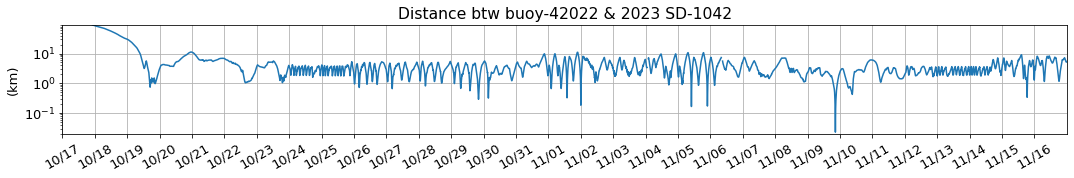

In [10]:
### compute distance btw buoy & SD
dist_buoy_SD = np.ones( dtime_airsea.shape )
for t in range( len(dtime_airsea) ):
    dist_buoy_SD[t] = distance(lat_buoy, lon_buoy, lat_SD[t], lon_SD[t])

tlim_plot = [datetime.datetime(int(year),10,17), datetime.datetime(int(year),11,17)]
nday_plot = (tlim_plot[1]-tlim_plot[0]).days
tticks = [tlim_plot[0]+datetime.timedelta(days=i) for i in range(nday_plot)]
tticks_label = [tticks[i].strftime('%m/%d') for i in range(len(tticks))]
### plot distance
nrow = 1
plt.clf()
fig, ax = plt.subplots(nrow)
plt.gcf().set_size_inches(18, 2)
plt.rcParams.update({'font.size': 13})
###
plt.semilogy( dtime_airsea, dist_buoy_SD )
plt.xticks(tticks,rotation=30)
plt.gca().set_xticklabels(tticks_label)
plt.xlim(tlim_plot)
plt.yticks([1e-1,1e0,1e1])
plt.ylim([2e-2,9e1])
plt.grid()
plt.ylabel('(km)')
plt.title('Distance btw buoy-'+buoy_id+' & '+year+' SD-'+platf_num)
### save figure
plt.savefig('timeseries_dist_ncbc-'+buoy_id+'_'+tlim_plot[0].strftime('%Y%m%d-')+tlim_plot[1].strftime('%m%d')\
            +'.png',dpi=300,bbox_inches='tight')

min, mean, max distance: 0.023 km, 3.64 km, 11.25 km
10, 90 percentile: [1.53385583 6.25269919]


(array([ 309., 1501., 3390., 5644., 5249., 5537., 5077., 3331., 2378.,
        2194., 2111., 1097., 1182.,  533.,  335.,  261.,  271.,  174.,
         150.,  210.]),
 array([ 0.02288464,  0.58424068,  1.14559672,  1.70695275,  2.26830879,
         2.82966483,  3.39102087,  3.95237691,  4.51373294,  5.07508898,
         5.63644502,  6.19780106,  6.7591571 ,  7.32051313,  7.88186917,
         8.44322521,  9.00458125,  9.56593729, 10.12729332, 10.68864936,
        11.2500054 ]),
 <BarContainer object of 20 artists>)

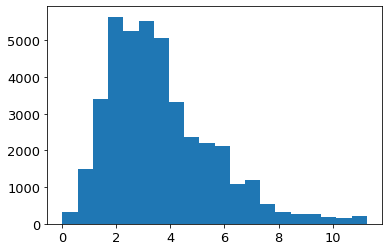

In [4]:
### look at a smaller domain
it = np.where( (dtime_airsea>= datetime.datetime(int(year),10,19,12)) & (~np.isnan(dist_buoy_SD)) )[0]
print('min, mean, max distance: {:.3f} km, {:.2f} km, {:.2f} km'.\
      format(np.min(dist_buoy_SD[it]),np.mean(dist_buoy_SD[it]),np.max(dist_buoy_SD[it])))
print('10, 90 percentile:',np.percentile(dist_buoy_SD[it],[10,90]) )
### plot histogram
plt.hist(dist_buoy_SD[it],20)